In [10]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import openpnm as op
from skimage.morphology import binary_dilation

In [55]:
final_image = np.load('subBeadPackPy.npy')

# Pull out a sub image
orig_image = final_image
final_image = final_image[0:250,0:250,250]
im = final_image

#plt.imshow(final_image)
test = np.array(final_image)
im = np.array(im)

In [56]:
test[im == 0] = 1
test[im == 1] = 0
#test[final_image == 1] = 0

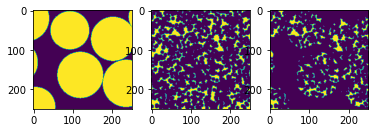

In [67]:
test.astype(bool)
#im2 = ps.generators.blobs(shape=[250, 250], blobiness=1)
#im2 =  ps.generators.RSA(im=im, radius=12)
im2 = ps.generators.overlapping_spheres(shape=[250,250],radius=5,porosity=0.2)
im3 = test.astype(bool) * im2

fig, ax = plt.subplots(1, 3)
ax[0].imshow(test)
ax[1].imshow(im2)
ax[2].imshow(im3)

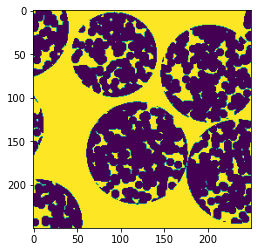

In [68]:
im4 = np.copy(im3)
im4[test == 0] = 1


plt.imshow(im4)

In [26]:
#Save initial porosity
ps.metrics.porosity(final_image)

0.34336

In [27]:
ps.io.to_palabos(final_image,'out.dat',0)


In [28]:
grains = final_image[final_image==0]